# Lec 2. Linear Regression, Logistic Regression

## Notation:

### 1) d: dimension of $x_i$

### 2) n: number of $x_i$

## 1. Linear Regression

### 1.1 Problem:

### What we have: 

### $x_{i}\in R^{d}$, $y_{i}\in R$, $h(x)=w^{T}x_{i},\space w\in R^{d}$, 

### $\rightarrow$ $\min\limits_{w\in R^{d}}\sum\limits_{i=1}^{n}(\underbrace{w^{T}x_{i}}_{inner\space product}-y_{i})^{2}\frac{1}{n}$

 we want to solve $w$ to $\underline{minimize}$ the ERM. $\rightarrow$ __take derivative__ 

### 1.2 Solve

### $\Rightarrow\sum\limits_{i=1}^{n}\sum\limits_{j=1}^{d}(w[j]x_{i}-y_{i})^{2}=J(W)$

### $\frac{\partial J(w)}{\partial w_{j}}=\sum\limits_{i=1}^{n}\{2\sum\limits_{j=1}^{d}(w[j]x_{i}[j]-y_{i})x_{i}[j]\}\xrightarrow[let]{}0;$

### $w\in R^{\space 1\space\times\space d}$

### \begin{equation}
x_{i}\in\space R^{d},\space y_{i}\in R\space\rightarrow Y:\space R^{1\times n}
\\
where,\space x_{i}\rightarrow X:\space R^{d\times n};
\space where,\space [x_{1}^{d\times 1},x_{2}^{d\times 1},...,x_{n}^{d\times 1}]
\end{equation}

### \begin{equation}
  label \left \{
  \begin{aligned}
    &X\in R^{\space d\times n}\space\space[x_{1},x_{2},x_{3},...,x_{n}]_{d}\\
    &y\in R^{1\times n}\space\space [y_{1},y_{2},y_{3},...,y_{n}]
  \end{aligned} \right.
\end{equation} 

### \begin{equation}
\min\limits_{w}\|w^{T}_{1\times d}X_{d\times n}-y_{1 \times n}\|^{2}_{2}
\\
=\frac{\partial}{\partial w}[(w^{T}X-y)^{T}_{n\times 1}(w^{T}X-y)_{n\times 1}] _ {n\times n}
\\
=2(w^{T}X-y)X^{T}_{n\times d}
\\
\Rightarrow w^{T}_{d\times 1}X_{d\times n}X^{T}_{n\times d}=yX^{T}_{n\times d}
\end{equation}

norm of $v \in R^{n}$, $\|v\|_{2}=\sqrt{\sum\limits_{i=1}^{n}V_{i}^{2}}=\sqrt{V^{T}V}$

1. n < d, $rank(XX^{T}) < D$
2. n = d, $w = (XX^{T})^{-1}Xy^{T}$

### For Case 1:

Number of samples is smaller than the number of feature (dimension) of samples.

When matrix $XX^T$ is not full rank $\rightarrow$ __Regularization__, __L1__ or __L2__


- __L2__: 

    - ### $w^*=arg\space \min\limits_w [(y-xw)^T(y-xw)+\lambda||w||^2_2]$

- where $\lambda>0$, used to adjust ration between Regularization and variance of error;

- $||...||_2$ is norm $L_2$

#### $siz(XX^{T})=d\times d, d=1, w=R^{1}$
#### $rank(XX^{T})=1,X\in R^{1},y\in R^{1}$

$(XX^{T}+\lambda I)^{-1}Xy^{T}=w$

- $\lambda : Singular Value$
- $A\in R^{\space m\times n}$
- $A=U\Sigma V^{T}$

### For Case 2:

$w = (XX^{T})^{-1}Xy^{T}$

## 2. Ridge Regression

### $\frac{1}{n}\|w^{T}X-y\|^{2}_{2}+\underset{\lambda \|w\|^{2}_{1}}{\lambda \|w\|^{2}_{2}},\space \lambda >\space 0$

### $J(w)=\frac{1}{m}\|w^{T}X-y\|^2_2$

- Move $w_0$ to get smaller J(w) by $\Delta$  along the negative direction of the gradient, now $w_{0}\rightarrow w_{1}$

- for $w_{1}$ do the same thing,
- ...

### Algorithm:

Get  $\nabla J(w)$

$1^o$. Satart with arbitrary $w_{0}$

### $\frac{\partial J(w)}{\partial w}=2(w^{T}_{1\times n}X_{n\times d}-Y)X^{T}_{1\times d},\space\space for\space t=1...T$

$2^o$. 
\begin{equation}
         w^{(1)}=w^{0}-\underset{learning\space rate}{\Delta}\nabla J(w^{0})
         \\
         .
         \\
         .
         \\
         .
         \\
         w^{(t)}=w^{t-1}-\Delta\nabla J(w^{t-1})
\end{equation}




$\Rightarrow$ Output: $w^{*}=w^{T}$

time consuming: $\nabla J(w)=2(w^{T}X-Y)X^{T},\space\space\space\space\space\space O(dn^{2})$

$\hookrightarrow$ it will be improved as long as the direction we choose makes the subjective smaller 

#### Note: Original Algorithm -> $J(w)=\sum\limits_{i}^{n}(w^{T}X_{i}-Y_{i})^2$


\begin{equation}
\frac{\partial J(w)}{\partial w}=\sum\limits_{i=1}^{n}\frac{\partial}{\partial w}(w^{T}X_{i}Y_{i})^2
\\
=\frac{\partial}{\partial w}(w^{T}X_{1}-Y_{1})^2+\frac{\partial}{\partial w}(w^{T}X_{2}-Y_{2})^2+...
\end{equation}

$\rightarrow$ Instead of taking the derivative of all samples, we choose $S_{i}(X_{i},Y_{i})$ for n samples as $S_t$

### \begin{equation}
\nabla J(w)\bigg|_{w^{t-1}}=\frac{\partial}{\partial w}(w^{T}\underset{RV}{X_{t}}-Y_{t})^2\space\leftarrow not\space robostic
\\
\Rightarrow w^{t}=w^{t-1}-\Delta\nabla J(w)\bigg|_{w=w^{t-1}}
\end{equation}

Since $X_t$ is Rv, we want to find $E\{\Delta J(w^t)\}$

## \begin{equation}
E\{\nabla J(w^{t})\}=\frac{1}{n}\frac{\partial}{\partial w}(w^{T}X_{1}-Y_{1})^2+\frac{1}{n}\frac{\partial}{\partial w}(w^{T}X_{2}-Y_{2})^2+...
\\
=\frac{1}{n}\sum\limits_{i=1}^{n}(w^{T}X_{i}-Y_{I})X_{i}^{T}\xrightarrow[E\{\nabla J(w^{t})\}=\nabla J(w^{t})]{Unbiased\space Estimator}\nabla J(w)=\frac{\partial}{\partial w}(X_{t}-Y_{t})^2
\end{equation}

#### Unbiased Estimator:
## $E\{ \hat{r\space}\}=r$

#### Note:
When d $\rightarrow$ hudge, $J(w)=\|w^{T}X-Y\|_{2}^{2}+\lambda\|w\|_{1}$, where $\|w\|_{1}=\sum\limits_{i=1}^{d}|w_{1}|$

### 2.1 Understand It in Bayes Way:

### $y_{i}=\underset{\downarrow \space fixed}{w^{T}}\underset{\uparrow \space fixed}{X_{i}}+\epsilon_{i},\space \epsilon_{i}\sim N(0,\sigma^2)$

### \begin{equation}
P(y_{i}|x_{i},w)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{1}{2\delta^{2}}(y_{i}-w_{i}^{T}X_{i})}
\\
\Rightarrow \underset{a\space function\space of\space \epsilon}{P(Y|\underset{\triangle}{w},\underset{\triangle}{X})}=\prod\limits_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(y_{i}-w_{i}X_{i})^2}
\\
=(\frac{1}{\sqrt{2\pi\underset{\space\space\space\space\space\large \uparrow given}{{\sigma^{2}}}}})exp[\underbrace{-\frac{\sum\limits_{i=1}^{n}(y_{i}-w_{i}^{T}X_{i})^{2}}{2\sigma^2}}_{\large maximize\space it}]
\end{equation}

#### $\rightarrow$ MLE: Maximum Likelihood Estimator
$\hookrightarrow$ choose $w_{i}$ to make the data as high probability as possible

\begin{equation}
arg\max\limits_{h}P(Y|h)
\\
\Rightarrow arg\max\limits_{w}P(Y|w,X)\Leftrightarrow \min\limits_{w}\underline{\sum_{i=1}^{n}(y_{i}-w_{i}^{T}X_{i})^{2}}
\end{equation}

#### $\rightarrow$ Maximize  A Posterior Estimator 

### \begin{equation}
arg \max P(\underset{\downarrow\space what's\space the\space distribution\space of\space h\space?}{h}|\underset{\space\space\space\space\space\space\space\space\space\uparrow\space(X,Y)}{S})
\\
P(w|\underset{observation}{Y})
\\
=\frac{P(w,Y)}{P(Y)}=\frac{P(\underset{prior}{w})P(Y|w)}{P(Y)}
\\
\Rightarrow arg\max\limits_{w}P(w|Y)\xrightarrow{give\space P(Y)}{\underset{=\space\frac{1}{P(Y)}}{\alpha} P(w)P(Y|w)}
\end{equation}

### $Build\space w_{i} \sim N(0,\sigma_{w_{i}}^2)\space for\space all\space i\in1,...,d$ 

### $P(Y|w)P(w)=(\frac{1}{\sqrt{2\pi \sigma^2}})^{n}exp[\underline{-\frac{\sum\limits_{i=1}^{n}(y_i-w_{i}^{T}X_{i})^2}{2\sigma^2}}](\frac{1}{2\pi\sigma_{w}^2})^{d}exp[\underline{-\frac{\sum\limits_{i=1}^{d}w_{i}^{2}}{2\sigma_{w}^2}}],\space maximize\space$

### \begin{equation}
\space \Rightarrow
+\frac{\sum\limits_{i=1}^{d}w_{i}^{2}}{2\sigma_{w}^{2}}+\frac{\sum\limits_{i=1}^{n}(y_{i}-w_{i}^{T}X_{i}^{2})}{2\sigma^{2}}
\\
\Rightarrow arg\max\limits_{w}\space \|y-w^{T}X\|_{2}^{2}+\frac{\sigma^{2}}{\sigma_{w}^{2}}\|w\|_{2}^{2}
\end{equation}

## 3. Linear Regression Code

### \begin{equation}
w\in arg\min\|y-w^{T}X\|_{2}^{2}
\\
\Rightarrow 2(y-w^{T}X)X^{T}=0
\\
\Rightarrow w^{T}XX^{T}=yX^{T}
\\
\Rightarrow XX^{T}w=Xy^{T}
\\w=(XX^{T})^{-1}Xy^{T}
\end{equation}

### Method 1: Linear Regression -> Calculate Directly

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
from numpy.linalg import norm
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Step 1. Generate Random Samples

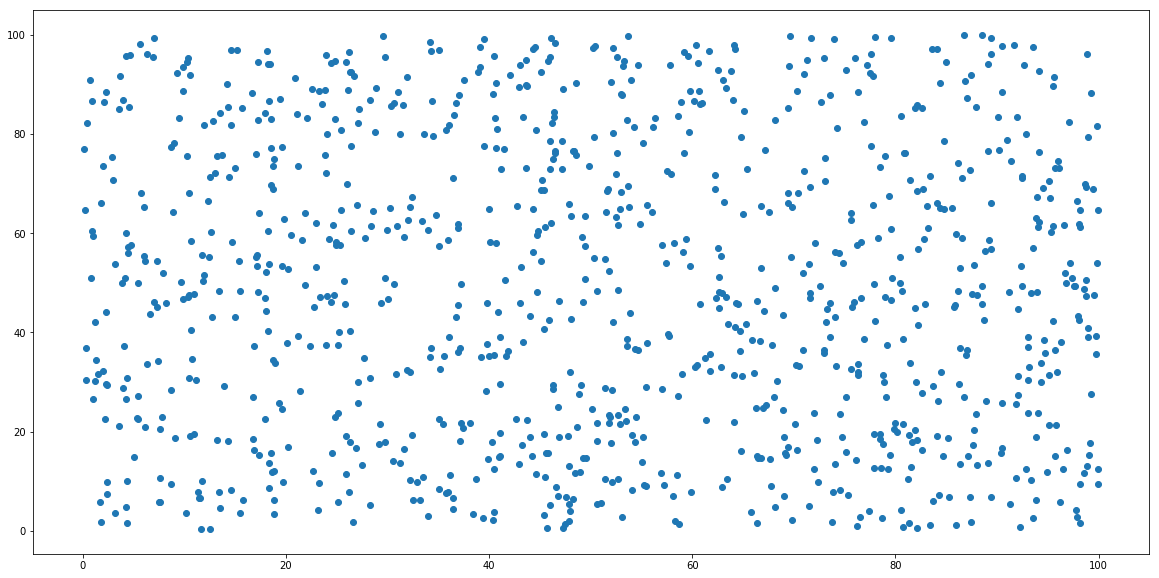

In [200]:
d, N = 2, 1000
X = np.random.rand(d,N)*100
plt.scatter(X[0,:],X[1,:])

### Step 2. Generate Observations

### Now, set $w^T$ and noise $\epsilon$ (both are guassin distirbution): $y = w^{T}X+\epsilon$

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


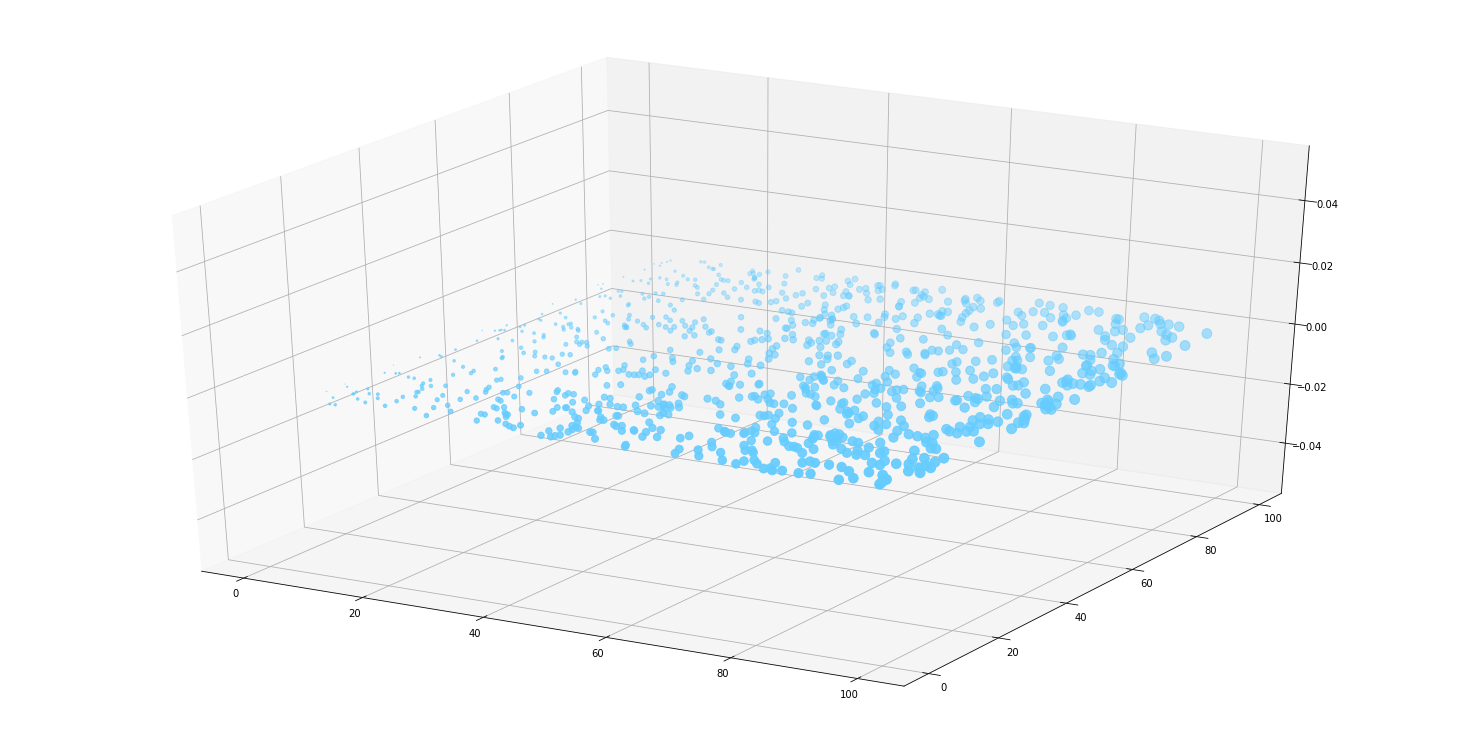

In [201]:
mu,sigma = 0,1
w = np.random.normal(mu,sigma,2)
eps = np.random.normal(mu,sigma)*5
wT = w.transpose()
y = np.dot(wT,X) + eps
y0 = np.dot(wT,X)
fig1 = plt.figure()
ax = Axes3D(fig1)
plt.scatter(X[0,:],X[1,:],y, color = '#66ccff')

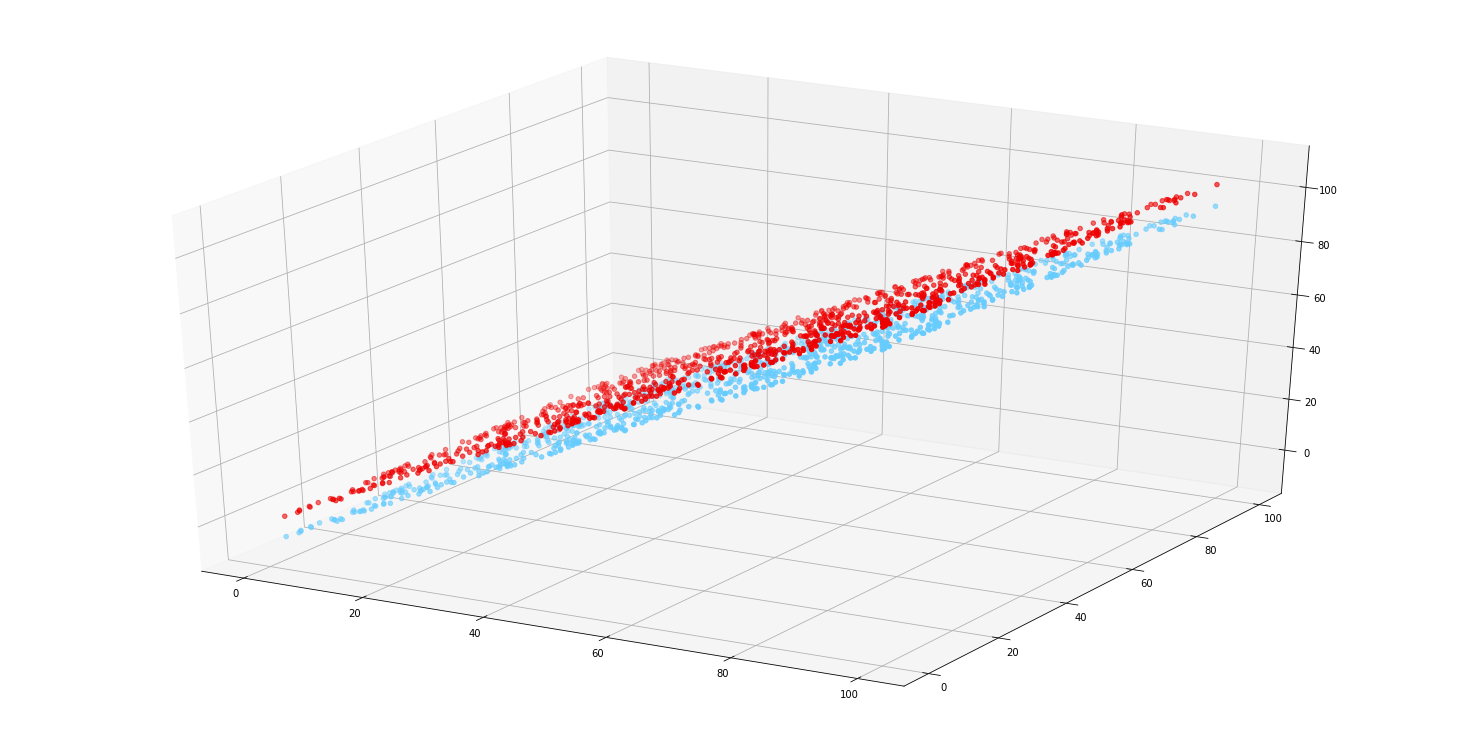

In [202]:
fig2 = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig2)
ax.scatter(X[0,:],X[1,:],y0,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y, color = '#66ccff')
plt.show()

### Step3. Calculate w

### In Linear Regression, we want to solve w

In [203]:
XT = X.transpose()
yT = y.transpose()
w1h = np.dot(np.dot(inv(np.dot(X,XT)),X),yT)

In [204]:
norm(w - w1h)

0.096045319877290425

In [205]:
y_pre = np.dot(w1h,X)

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


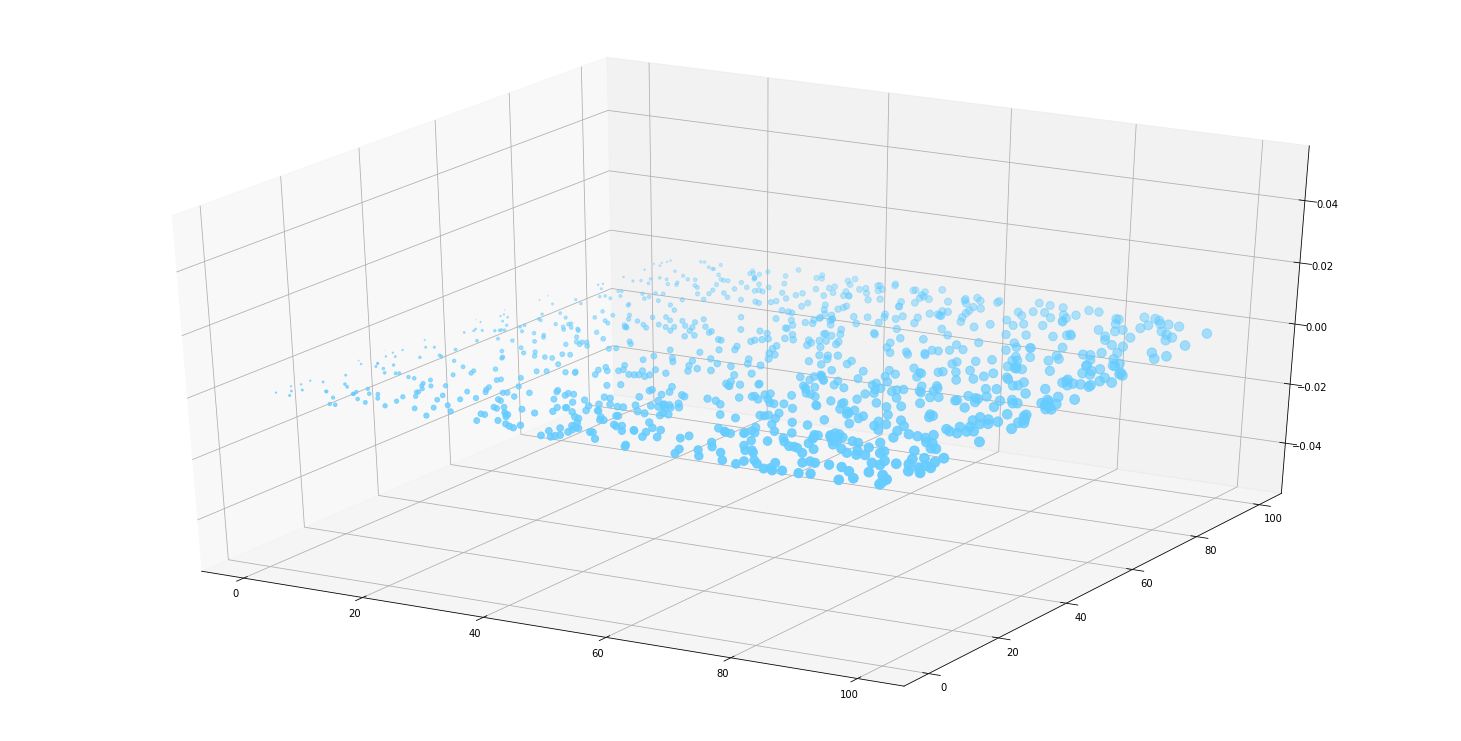

In [206]:
fig3 = plt.figure()
ax = Axes3D(fig3)
plt.scatter(X[0,:],X[1,:],y_pre, color = '#66ccff')

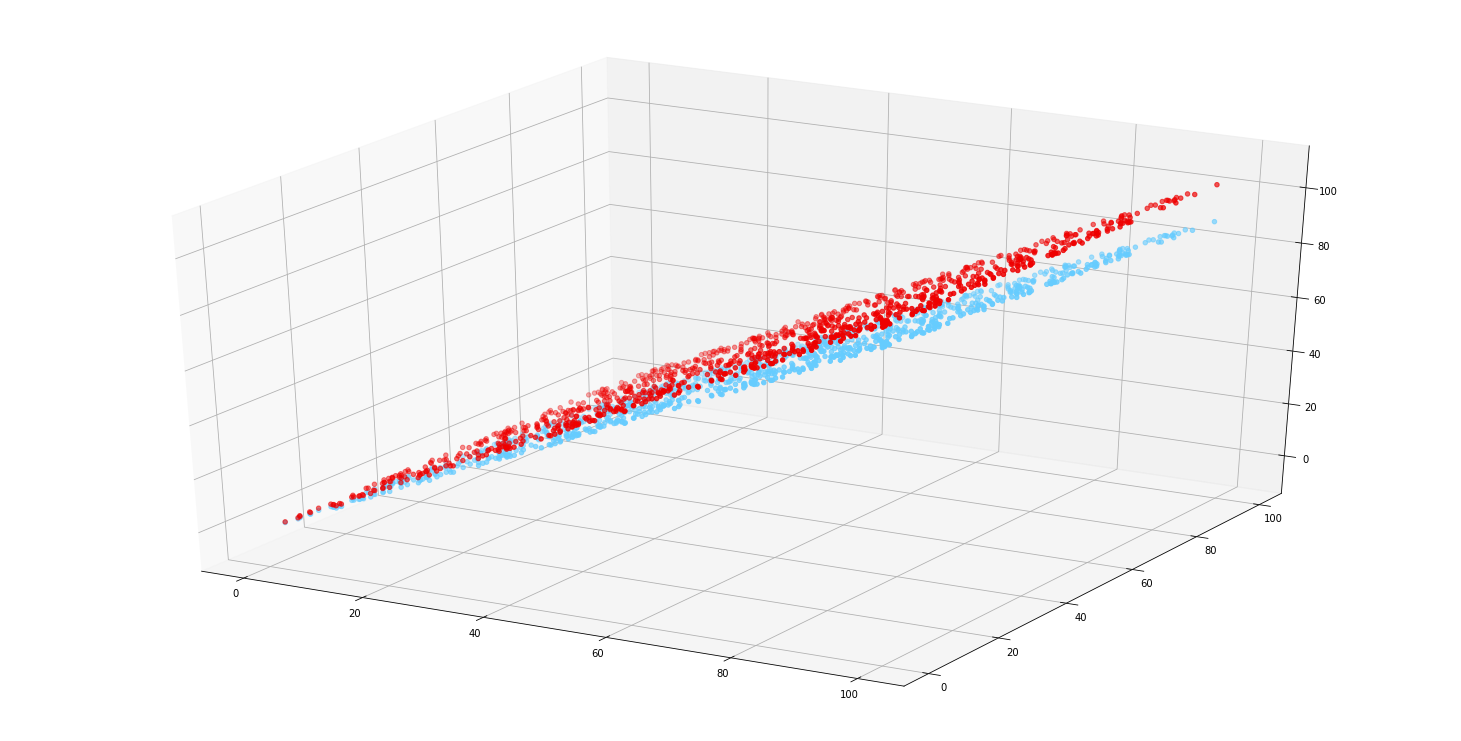

In [207]:
fig4 = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig4)
ax.scatter(X[0,:],X[1,:],y0,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre, color = '#66ccff')
plt.show()

In [208]:
norm(np.dot(w1h,X).reshape(N,1)-y0.reshape(N,1))

232.12865520091015

### Method 2: Stochastic Gradient Descent

### Step 3. Calculate w

### $w^+\space =\space w\space -\space \Delta (w^TX\space-\space y)X^T $

In [209]:
w2h = np.random.normal(mu,sigma,2)
# sgd = 0

In [210]:
T = 100000
delta = 0.00001

for i in range(T):
    
    # gd = delta*np.dot((np.dot(w2h,X)-y),XT)
    # sgd += gd
    obj_before = norm(np.dot(w2h,X).reshape(N,1)-y.reshape(N,1))
    w2h = w2h - delta * np.dot((np.dot(w2h,X)-y),XT)
    obj_after = norm(np.dot(w2h,X).reshape(N,1)-y.reshape(N,1))
    if (obj_after > obj_before):
        delta = delta/2

In [211]:
y_pre_new = np.dot(w2h,X)

In [212]:
norm(np.dot(w2h,X).reshape(N,1)-y0.reshape(N,1))

232.12865520091034

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


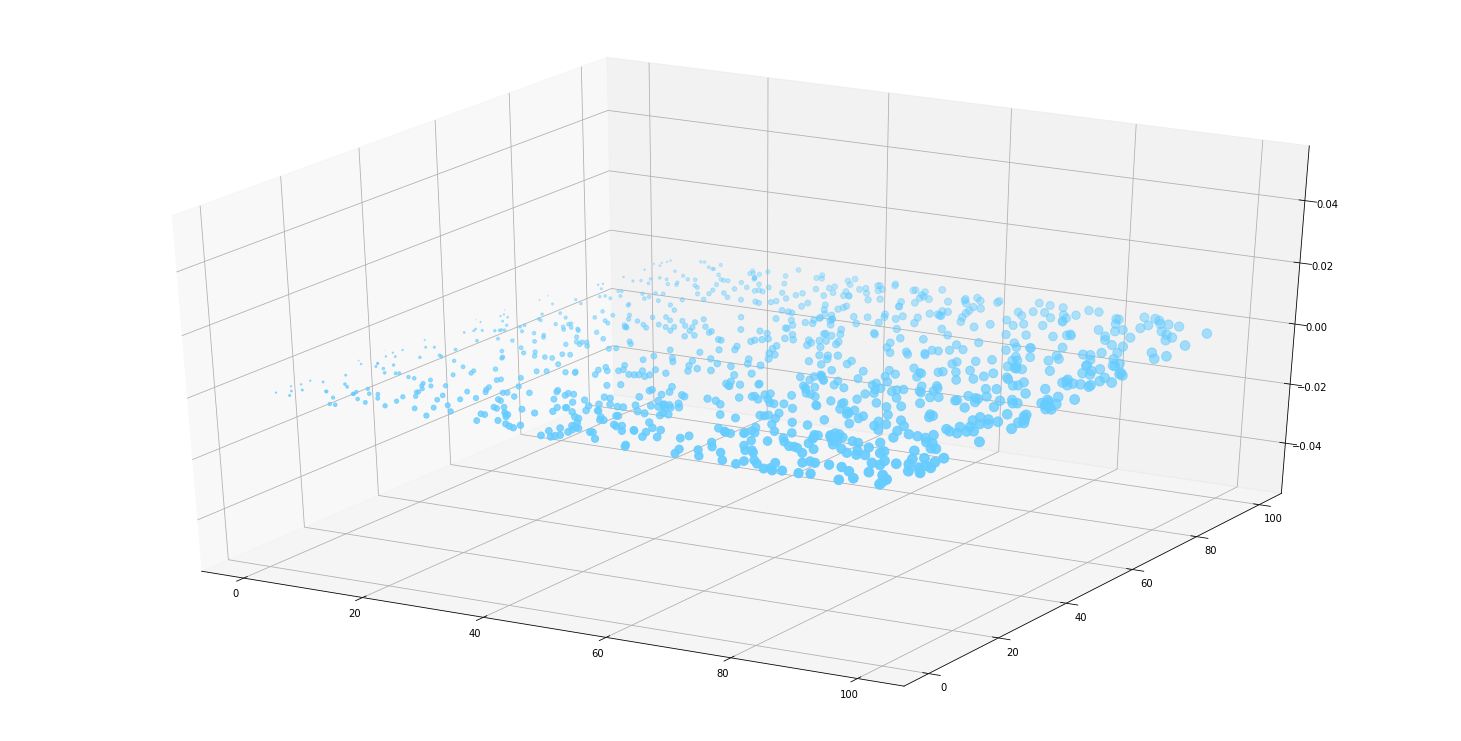

In [213]:
fig5 = plt.figure()
ax = Axes3D(fig5)
plt.scatter(X[0,:],X[1,:],y_pre_new, color = '#66ccff')

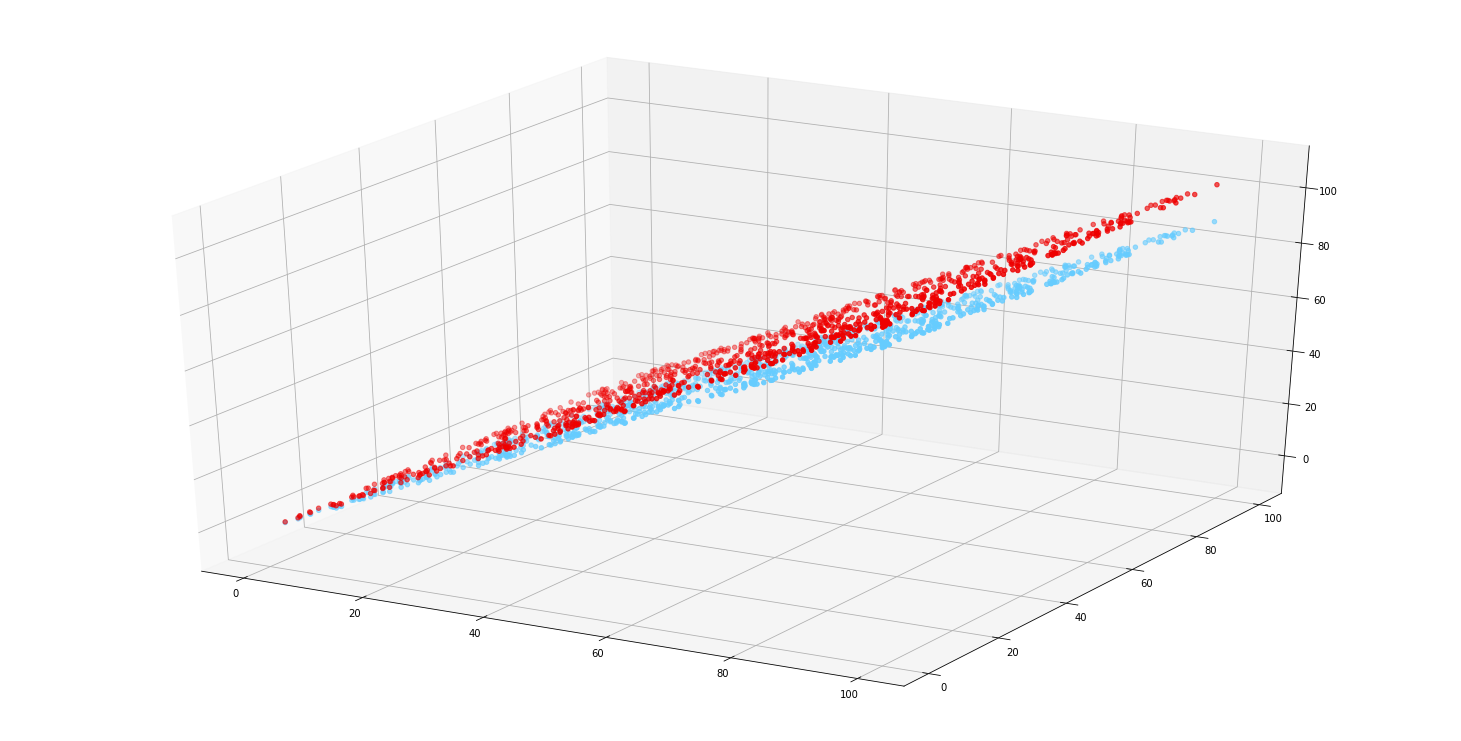

In [214]:
fig6 = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig6)
ax.scatter(X[0,:],X[1,:],y0,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_new, color = '#66ccff')
plt.show()

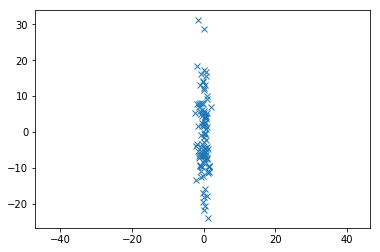

In [114]:
mu, sigma = 0, 0.1 # mean and standard deviative
s = np.random.normal(mu, sigma, 10000)

mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

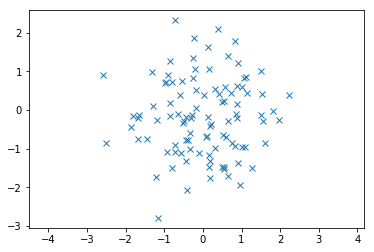

In [33]:
import numpy as np
import matplotlib.pyplot as plt
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

### Method 2: Gradient

# Example - Student

In [2]:
import pandas as pd
data = pd.read_csv('student.csv')

In [3]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

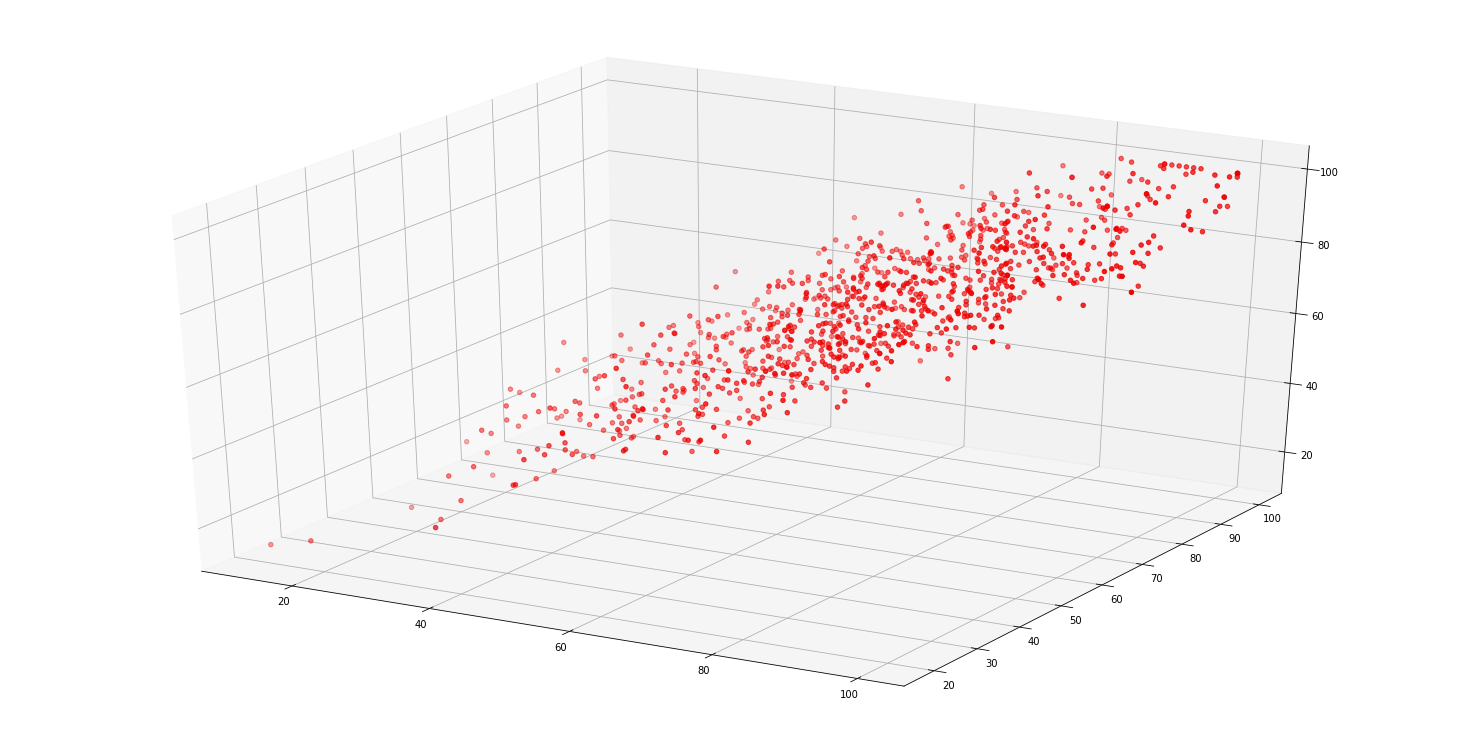

In [4]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color = '#ee0000')

## Method 1

In [7]:
X = [math.transpose(),read.transpose()]
X = np.asarray(X)
XT = X.transpose()
y = write.transpose()
yT = y.transpose()

In [8]:
w3h = np.dot(np.dot(inv(np.dot(X,XT)),X),yT)

In [9]:
y_pre_write = np.dot(w3h,X)

In [10]:
norm(y_pre_write - y)

144.90483756198427

In [11]:
m = len(math)
m

1000

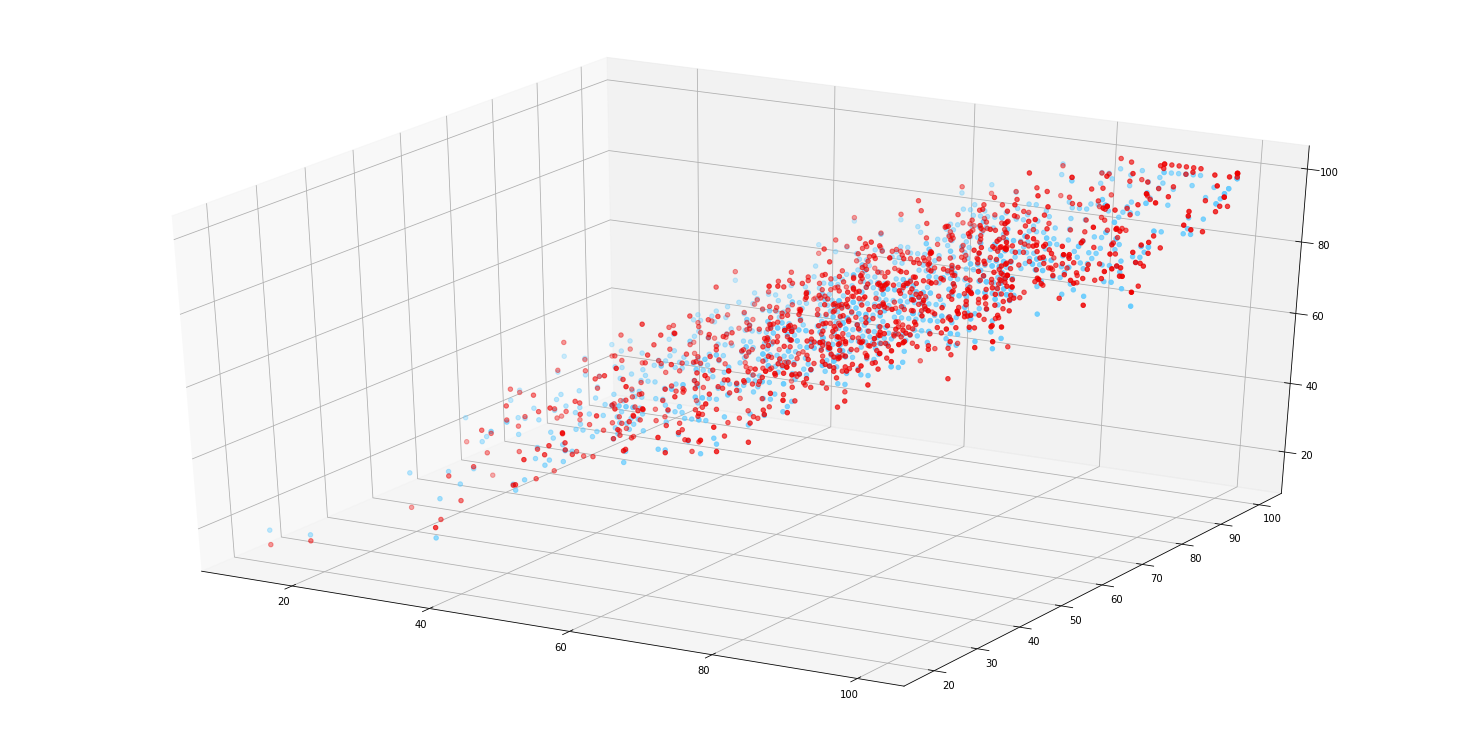

In [12]:
fig = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig)
ax.scatter(X[0,:],X[1,:],y,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_write, color = '#66ccff')
plt.show()

## Method 2

In [45]:
mu, sigma = 0, 0.1 # mean and standard deviative
s = np.random.normal(mu, sigma, 10000)
w4h = (np.random.normal(mu,sigma,2))

In [46]:
T = 100000
delta = 0.00001

for i in range(T):
    
    # gd = delta*np.dot((np.dot(w2h,X)-y),XT)
    # sgd += gd
    obj_before = norm(np.dot(w4h.T,X).reshape(m,1)-y.reshape(m,1))
    w4h = w4h - delta * np.dot((np.dot(w4h,X)-y),XT)
    obj_after = norm(np.dot(w4h.T,X).reshape(m,1)-y.reshape(m,1))
    if (obj_after > obj_before):
        delta = delta/2

In [47]:
y_pre_write2 = np.dot(XT,w4h)

In [48]:
norm(y_pre_write2-y)

144.90483756198472

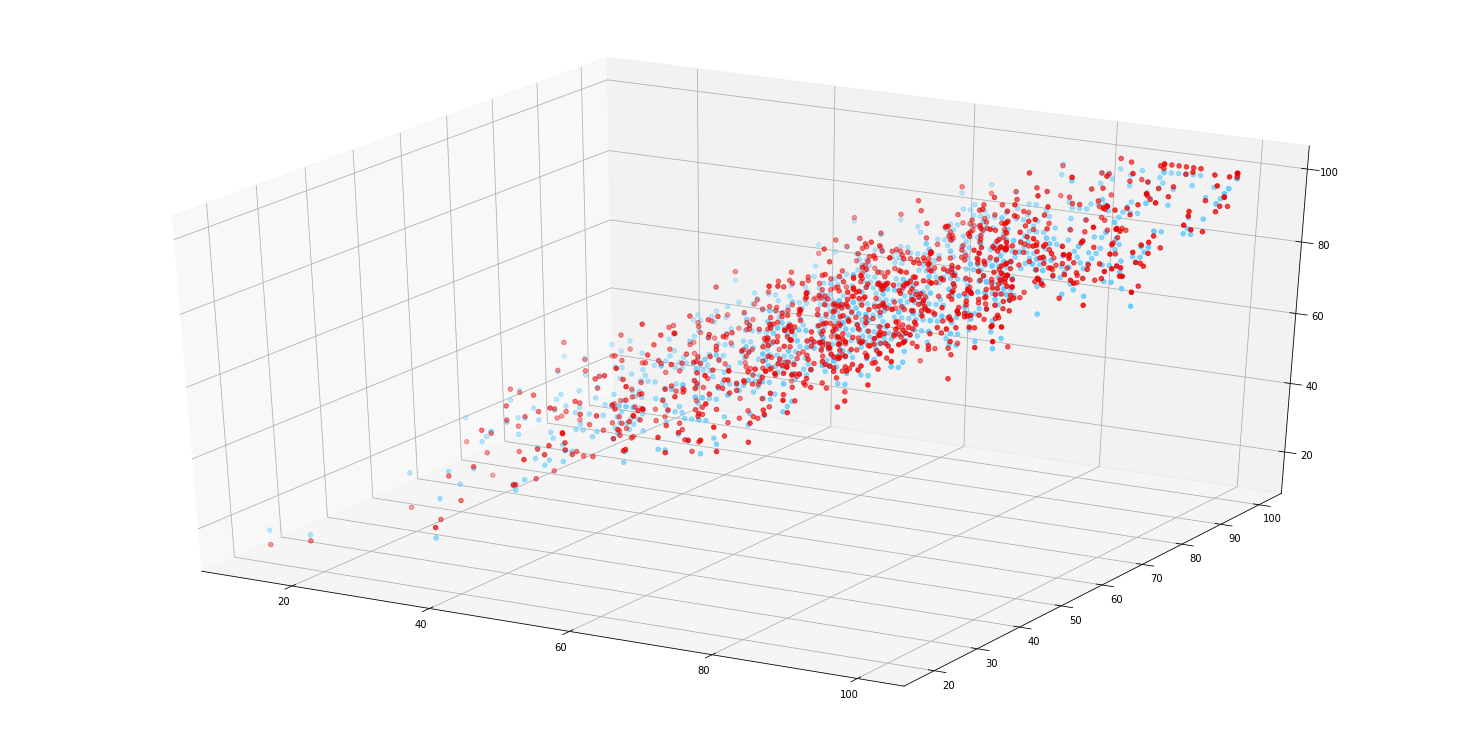

In [49]:
fig = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig)
ax.scatter(X[0,:],X[1,:],y,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_write2, color = '#66ccff')
plt.show()

## Gradient

### $w^+\space =\space w\space -\space \Delta (w^TX\space-\space y)X^T $

### 1) Cost Function: $\frac{1}{N}\sum(w^TX - y)^2$

In [50]:
mu, sigma = 0, 0.1 # mean and standard deviative
s = np.random.normal(mu, sigma, 10000)
w5h = np.random.normal(mu,sigma,2)

In [51]:
def cost_function(X, Y, B):
    N = len(Y)
    J = np.sum(((B.T).dot(X)-Y)**2)/(2*N)
    return J

In [52]:
inital_cost = cost_function(X,y,w5h)
inital_cost

1273.7030767313402

### 2) Gradient Descent

### $w^+\space =\space w\space -\space \Delta (w^TX\space-\space y)X^T $

In [57]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_rec = [0] * iterations
    N = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis
        h = (B.T).dot(X)
        # loss
        loss = h - Y
        # Gradient
        gradient = loss.dot(X.T)/N
        # Updating B
        loss_before = norm(loss)
        B = B - alpha * gradient
        loss_after = norm((B.T).dot(X)-Y)
        if loss_after > loss_before:
            alpha = alpha/2
        # New cost
        cost_new = cost_function(X,Y,B)
        cost_rec[iteration] = cost_new
    
    return B,cost_rec
        

In [58]:
w5h, cost_records = gradient_descent(X,y,w5h, 0.0001,100000)

In [67]:
cost_records[1]

18.790193251528979

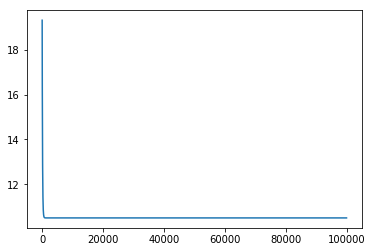

In [60]:
plt.figure(figsize = (6,4))
plt.plot(range(0,100000),cost_records)

In [61]:
y_pre_write3 = (w5h.T).dot(X)

In [68]:
norm(y_pre_write3-y)

144.90483756198537

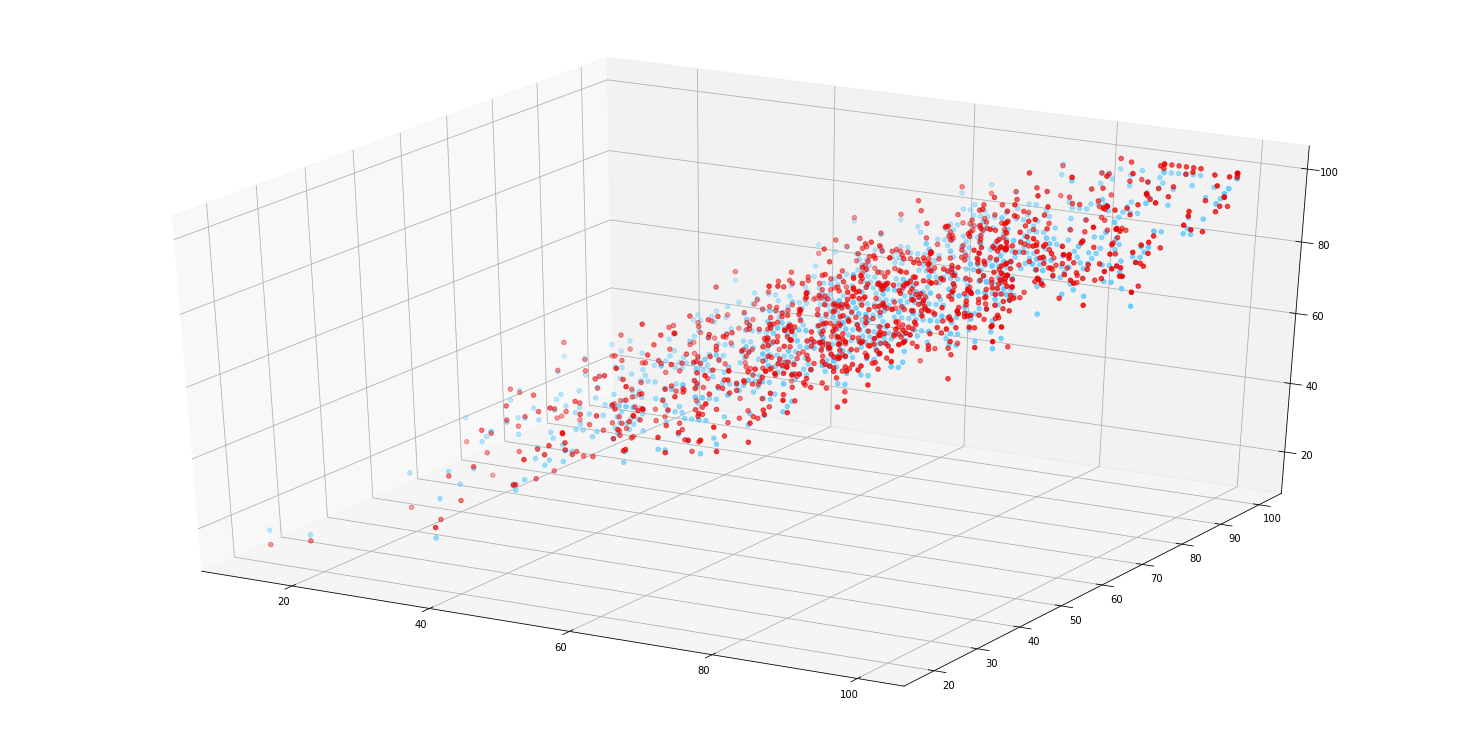

In [62]:
fig = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig)
ax.scatter(X[0,:],X[1,:],y,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_write3, color = '#66ccff')
plt.show()

### With intersect

In [76]:
x0 = np.ones(len(math))
X0 = np.asarray([x0.T,math.transpose(),read.transpose()])

In [77]:
mu, sigma = 0, 0.1 # mean and standard deviative
w6h = (np.random.normal(mu,sigma,3))

In [78]:
w6h, cost_records0 = gradient_descent(X0,y,w6h, 0.0001,100000)

In [83]:
y_pre_write4 = (w6h.T).dot(X0)

In [84]:
norm(y_pre_write4-y)

144.76255682596502

In [81]:
cost_records0[-1]

10.478098929395378

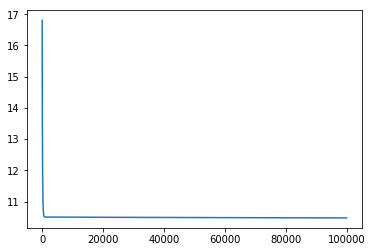

In [82]:
plt.figure(figsize = (6,4))
plt.plot(range(0,100000),cost_records0)

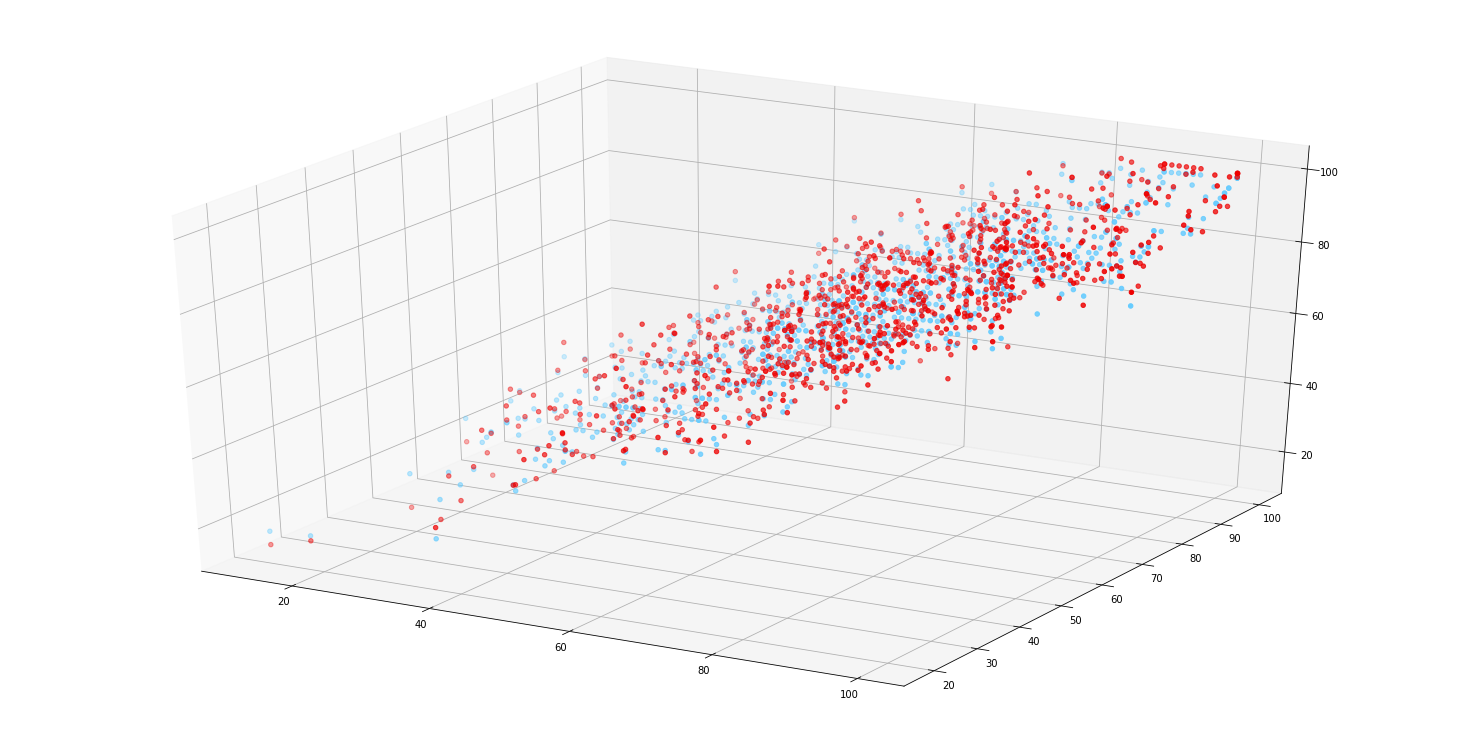

In [85]:
fig = plt.figure()
ax = plt.subplot(111)
ax = Axes3D(fig)
ax.scatter(X[0,:],X[1,:],y,color ='#EE0000')
ax.scatter(X[0,:],X[1,:],y_pre_write4, color = '#66ccff')
plt.show()

## 4. Minimum Likelihood Estimation

$logP(w|Y)=logP(w)+logP(Y|w)$

### $\rightarrow arg\max\limits_{w\in R^{d}}P\{Y|w,X\},\space function\space of\space w$

### $\rightarrow f(Y,X,w),\space give\space w^{1\times d},X^{1\times d},Y$

## 5.  Maximun A Posterior Estimation

### \begin{equation}
P(w|Y)=\frac{P(w,Y)}{P(Y)}=\frac{P(w)P(Y|w)}{P(Y)}
\\
assume\space\space w\sim N(0,\sigma_{w}^{2})
\\
arg\min\limits_{w\in R^{d}}\sum(y_{i}-w^{T}x_{i})^{2}+\lambda\|\underset{comes\space from\space a\space prior}{w}\|_{2}^{2}
\\
y=w_{i}x_{i}+\underset{\triangle}{\epsilon},\space where\space \epsilon\sim N(0,\sigma^{2}),\space w_{i}\sim N(0,\sigma_{w}^{2})
\\
P(w_{i})=\frac{1}{\sqrt{2\pi}\sigma_{w}}exp(-\frac{w_{i}^{2}}{2\sigma_{w}^{2}})
\\
...
\\
P(w)=(\frac{1}{\sqrt{2\pi}\sigma_{w}})^{d}exp(-\frac{\sum\limits_{i=1}^{d}{w_{i}^{2}}}{2\sigma_{w}^{2}})
\\
\Rightarrow P(Y|w)=\prod\limits_{i=1}^{N}\{\frac{1}{\sqrt{2\pi}\sigma}exp[-\frac{(y-w_{i}^{T}X_{i})^2}{2\sigma^{2}}]\}
\\
=(\frac{1}{\sqrt{2\pi}\sigma})^{N}exp[-\frac{\sum\limits_{i=1}^{N}(y-w^{T}X_{i})^2}{2\sigma^{2}}]
\\
...
\\
\Rightarrow (\frac{1}{\sqrt{2\pi}\sigma_{w}^{2}})^{d}(\frac{1}{\sqrt{2\pi}\sigma})^{N}exp\{-[\frac{\sum\limits_{i=1}^{d} w_{i}^{2}}{2\sigma_{w}^{2}}+\frac{\sum\limits_{i=1}^{N}(y-w_{i}^{T}X_{i})^{2}}{2\sigma^{2}}]\}
\\
\Rightarrow arg\min\lambda\|w\|_{2}^{2}+\|y-w^{T}X\|_{2}^{2}
\end{equation}

### $f(w)=\|w^{T}X-y\|_{2}^{2}$

PAC: Probability Approximation Correct (Adaptive)

### \begin{equation}
\frac{\partial f(w)}{\partial w}=
\begin{bmatrix} \frac{\partial f}{\partial w_{1}} \\ \frac{\partial f}{\partial w_{2}}\\  \vdots \\ \frac{\partial f}{\partial w_{n}}
\end{bmatrix}
\\
2(w^{T}X_{N\times 1}-y)X^{T}_{1\times N}
\end{equation}

# Appendix

## Reference

1. [Linear Regression from Scratch in Python](https://mubaris.com/2017-09-28/linear-regression-from-scratch)